# Data exploration

Starting to understand the dataset: identifying outliers & visualisation

In [1]:
#Setting up environment
import pandas as pd
import os
import numpy as np
from IPython.display import Math
 
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Uploading data
df_raw = pd.read_csv("/Suzi fun files/QB course/QB_DS_FinalProject/data/raw/data.csv", index_col=[0])
df_raw.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84300903           152.50      1709.0            0.1444             0.4245   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374             0.2050   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504                0.2430          0.3613   
84348301           0.6869                0.2575          0.6638   
84358402           0.4000                0.1625          0.2364   

          fractal_dimension_worst  Unnamed: 32  
id                                              
842302                    0.11890          NaN  
842517                    0.08902          NaN  
84300903                  0.08758          NaN  
84348301                  0.17300          NaN  
84358402                  0.07678          NaN  

[5 rows x 32 columns]

## Looking at the properties of each variable

In [3]:
#Describe variables
df_raw.describe(include = 'all')

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count        569   569.000000    569.000000      569.000000   569.000000   
unique         2          NaN           NaN             NaN          NaN   
top            B          NaN           NaN             NaN          NaN   
freq         357          NaN           NaN             NaN          NaN   
mean         NaN    14.127292     19.289649       91.969033   654.889104   
std          NaN     3.524049      4.301036       24.298981   351.914129   
min          NaN     6.981000      9.710000       43.790000   143.500000   
25%          NaN    11.700000     16.170000       75.170000   420.300000   
50%          NaN    13.370000     18.840000       86.240000   551.100000   
75%          NaN    15.780000     21.800000      104.100000   782.700000   
max          NaN    28.110000     39.280000      188.500000  2501.000000   

        smoothness_mean  compactness_mean  concavity_mean  \
count        569.000000        569.000000      569.000000   
unique              NaN               NaN             NaN   
top                 NaN               NaN             NaN   
freq                NaN               NaN             NaN   
mean           0.096360          0.104341        0.088799   
std            0.014064          0.052813        0.079720   
min            0.052630          0.019380        0.000000   
25%            0.086370          0.064920        0.029560   
50%            0.095870          0.092630        0.061540   
75%            0.105300          0.130400        0.130700   
max            0.163400          0.345400        0.426800   

        concave points_mean  symmetry_mean  ...  texture_worst  \
count            569.000000     569.000000  ...     569.000000   
unique                  NaN            NaN  ...            NaN   
top                     NaN            NaN  ...            NaN   
freq                    NaN            NaN  ...            NaN   
mean               0.048919       0.181162  ...      25.677223   
std                0.038803       0.027414  ...       6.146258   
min                0.000000       0.106000  ...      12.020000   
25%                0.020310       0.161900  ...      21.080000   
50%                0.033500       0.179200  ...      25.410000   
75%                0.074000       0.195700  ...      29.720000   
max                0.201200       0.304000  ...      49.540000   

        perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count        569.000000   569.000000        569.000000         569.000000   
unique              NaN          NaN               NaN                NaN   
top                 NaN          NaN               NaN                NaN   
freq                NaN          NaN               NaN                NaN   
mean         107.261213   880.583128          0.132369           0.254265   
std           33.602542   569.356993          0.022832           0.157336   
min           50.410000   185.200000          0.071170           0.027290   
25%           84.110000   515.300000          0.116600           0.147200   
50%           97.660000   686.500000          0.131300           0.211900   
75%          125.400000  1084.000000          0.146000           0.339100   
max          251.200000  4254.000000          0.222600           1.058000   

        concavity_worst  concave points_worst  symmetry_worst  \
count        569.000000            569.000000      569.000000   
unique              NaN                   NaN             NaN   
top                 NaN                   NaN             NaN   
freq                NaN                   NaN             NaN   
mean           0.272188              0.114606        0.290076   
std            0.208624              0.065732        0.061867   
min            0.000000              0.000000        0.156500   
25%            0.114500              0.064930        0.250400   
50%            0.226700              0.099930        0.282

In [4]:
#Data looks pretty clean
#Remove last column 
df_raw_dropped = df_raw.drop(df_raw.columns[-1], axis=1)
df_raw_dropped.head()
df_size_raw = df_raw_dropped.shape

In [2]:
#Check for outliers, plot histograms for all columns
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_raw_dropped.hist(ax = ax)

NameError: name 'plt' is not defined

## Seems that there are no outliers present, evaluate correlation

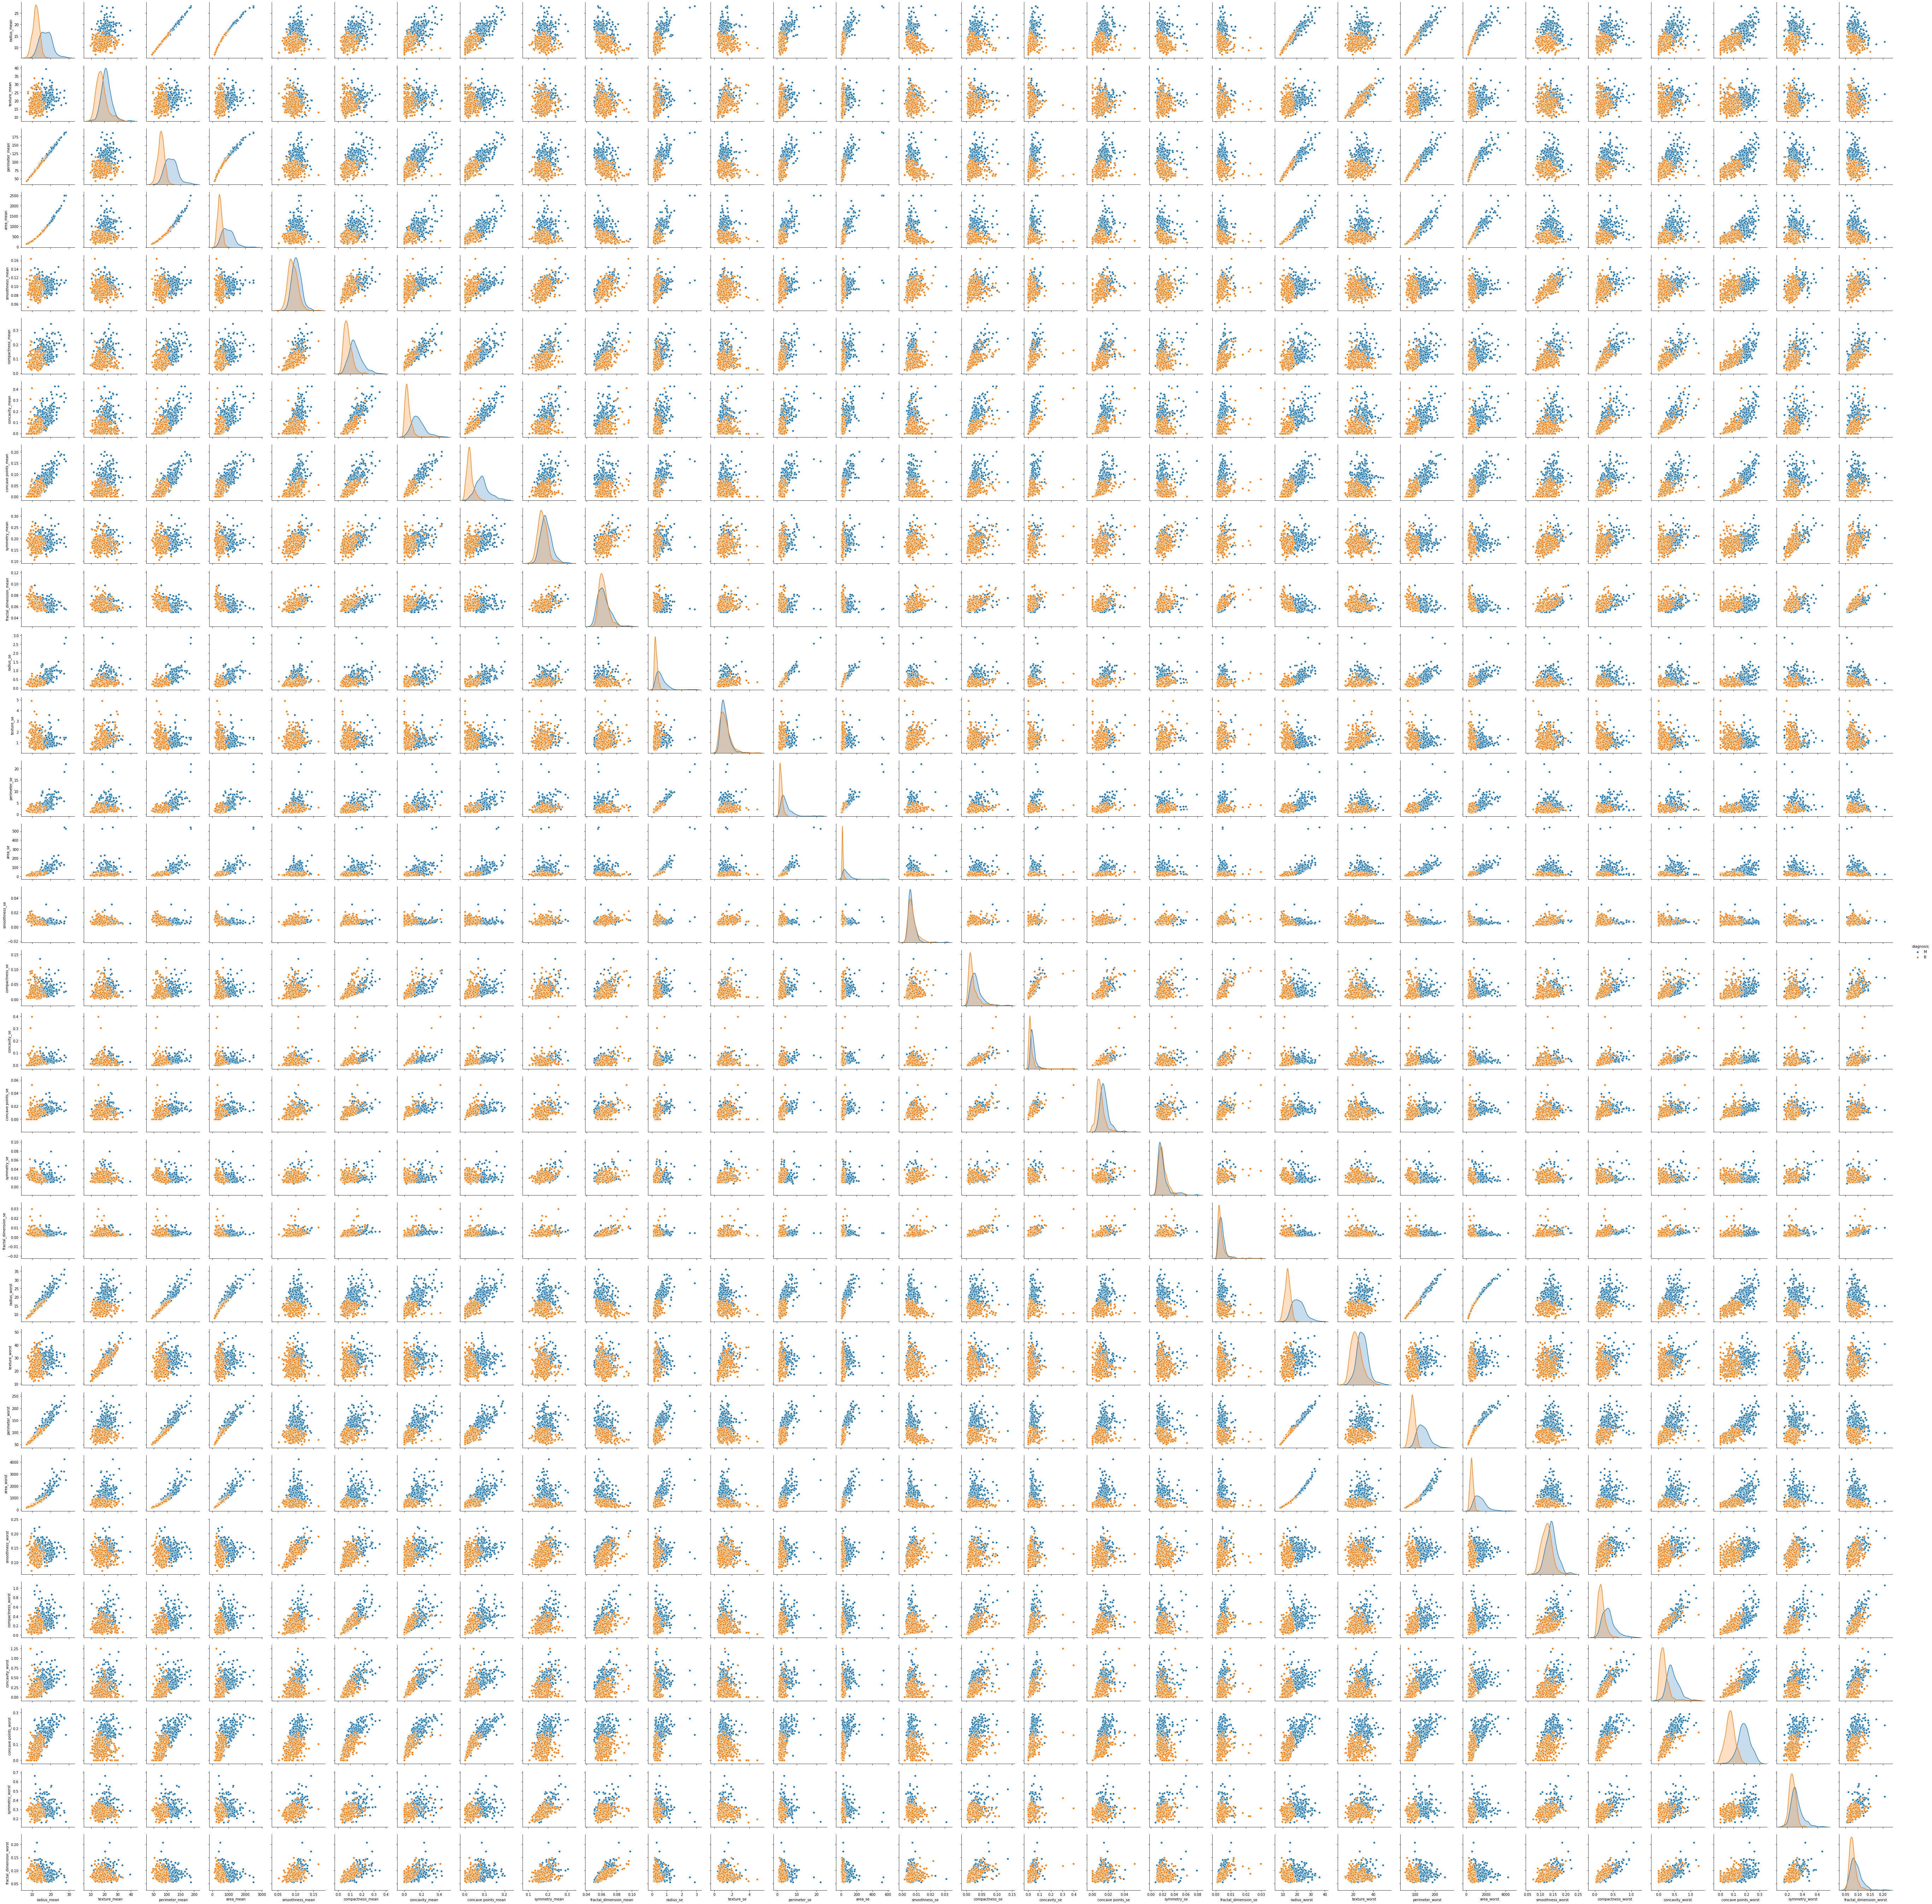

In [5]:
#Check bevaiour of all 
sns.pairplot(df_raw_dropped,hue = 'diagnosis')

### Some correlation between features is evident, lets explore further 
Plot inspired by https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

[Text(0, 0.5, 'diagnosis'),
 Text(0, 1.5, 'radius_mean'),
 Text(0, 2.5, 'texture_mean'),
 Text(0, 3.5, 'perimeter_mean'),
 Text(0, 4.5, 'area_mean'),
 Text(0, 5.5, 'smoothness_mean'),
 Text(0, 6.5, 'compactness_mean'),
 Text(0, 7.5, 'concavity_mean'),
 Text(0, 8.5, 'concave points_mean'),
 Text(0, 9.5, 'symmetry_mean'),
 Text(0, 10.5, 'fractal_dimension_mean'),
 Text(0, 11.5, 'radius_se'),
 Text(0, 12.5, 'texture_se'),
 Text(0, 13.5, 'perimeter_se'),
 Text(0, 14.5, 'area_se'),
 Text(0, 15.5, 'smoothness_se'),
 Text(0, 16.5, 'compactness_se'),
 Text(0, 17.5, 'concavity_se'),
 Text(0, 18.5, 'concave points_se'),
 Text(0, 19.5, 'symmetry_se'),
 Text(0, 20.5, 'fractal_dimension_se'),
 Text(0, 21.5, 'radius_worst'),
 Text(0, 22.5, 'texture_worst'),
 Text(0, 23.5, 'perimeter_worst'),
 Text(0, 24.5, 'area_worst'),
 Text(0, 25.5, 'smoothness_worst'),
 Text(0, 26.5, 'compactness_worst'),
 Text(0, 27.5, 'concavity_worst'),
 Text(0, 28.5, 'concave points_worst'),
 Text(0, 29.5, 'symmetry_worst')]

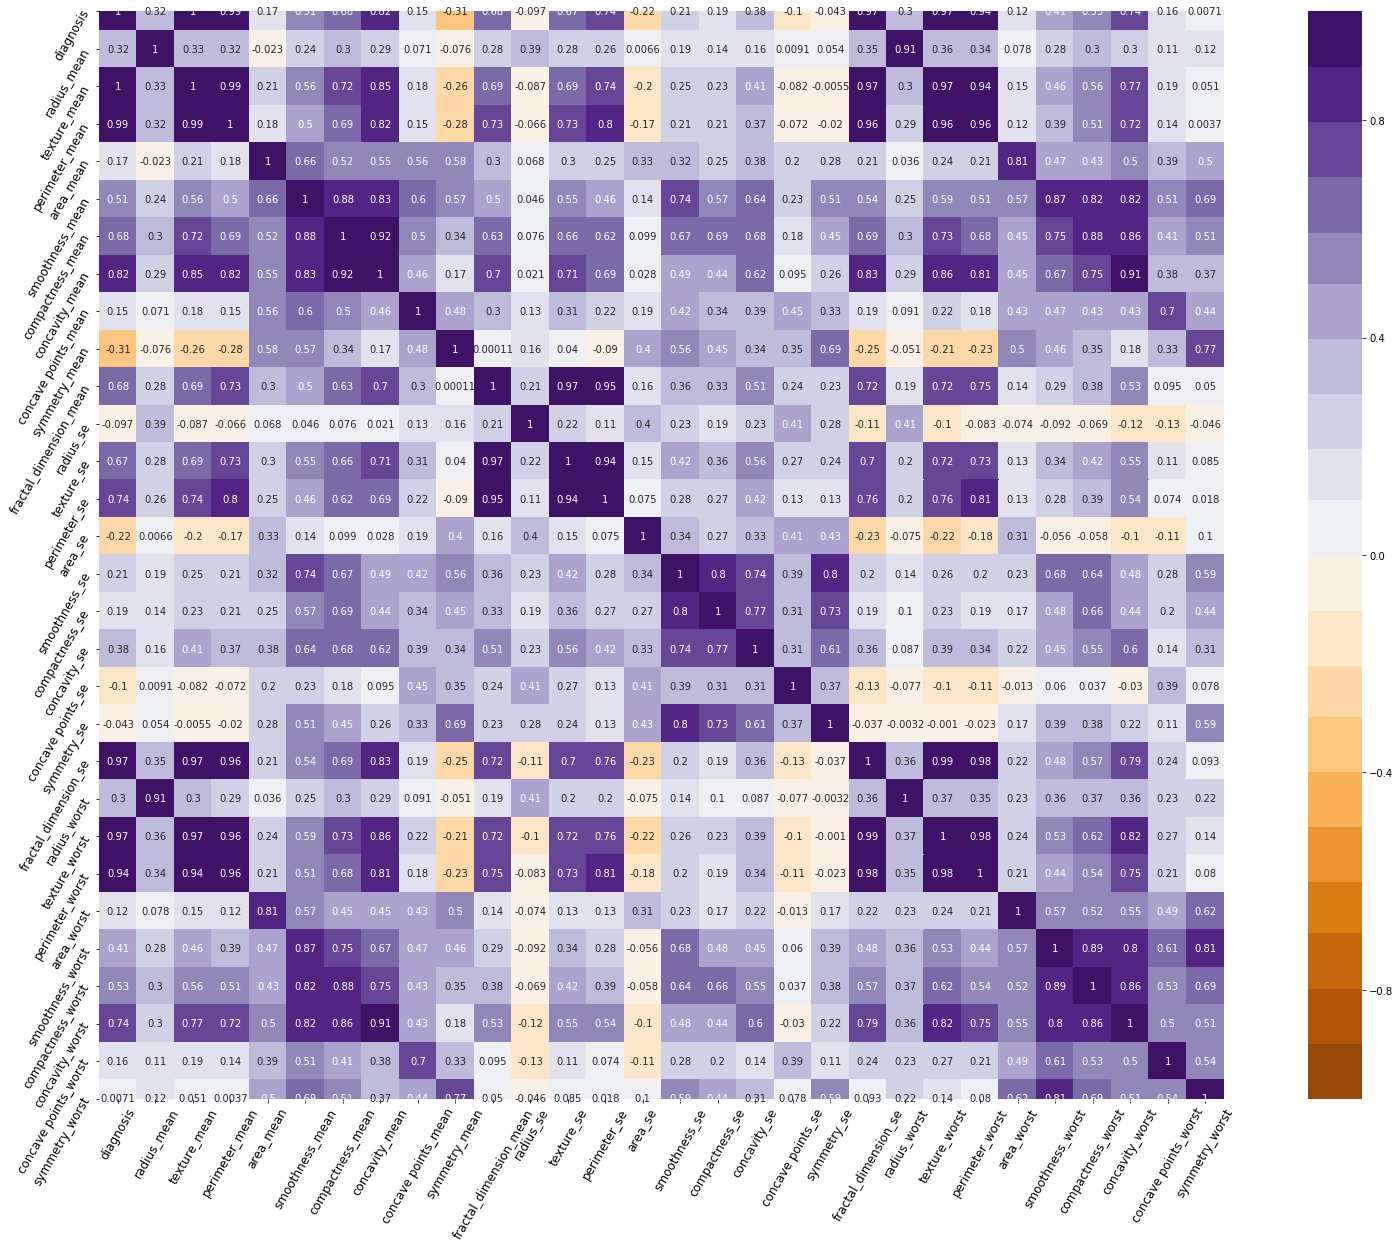

In [7]:
#Correlation plot
corr = df_raw_dropped.corr().values
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.color_palette("PuOr", 20),square=True,annot=True,)
labels=list(df_raw_dropped.columns)
ax.set_xticklabels(labels,fontsize=12,rotation=60)
ax.set_yticklabels(labels,fontsize=12,rotation=60)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

### There seems to be quite strong correlation between some features: multicollinearity. Decision trees and random forests are robust towards this! Could be a problem for logistic regression though and should be fixed in that case. 
check https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4

### Steps further in this project will try to reduce these features but lets keep those for now.

### Continuing data preparation: label encoding

In [8]:
#Label encoding of bening and malignant
df_object = df_raw_dropped.select_dtypes(include = ['object']).astype('category')
print(df_object.dtypes)
print('_______')
print(df_object.describe())

df_object['diagnosis_category'] = df_object['diagnosis'].cat.codes
df_object.head()
# Malignant = 1; bening = 0.

diagnosis    category
dtype: object
_______
       diagnosis
count        569
unique         2
top            B
freq         357


diagnosis  diagnosis_category
id                                    
842302           M                   1
842517           M                   1
84300903         M                   1
84348301         M                   1
84358402         M                   1

In [22]:
df=df_raw_dropped.drop(['diagnosis'],axis=1)
df['diagnosis_category'] = df_object['diagnosis_category']
print(df['diagnosis_category'].value_counts())
df.head()

0    357
1    212
Name: diagnosis_category, dtype: int64


radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
842302          17.99         10.38          122.80     1001.0   
842517          20.57         17.77          132.90     1326.0   
84300903        19.69         21.25          130.00     1203.0   
84348301        11.42         20.38           77.58      386.1   
84358402        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
id                                                                    ...   
842302                0.14710         0.2419                 0.07871  ...   
842517                0.07017         0.1812                 0.05667  ...   
84300903              0.12790         0.2069                 0.05999  ...   
84348301              0.10520         0.2597                 0.09744  ...   
84358402              0.10430         0.1809                 0.05883  ...   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0            0.1622   
842517            23.41           158.80      1956.0            0.1238   
84300903          25.53           152.50      1709.0            0.1444   
84348301          26.50            98.87       567.7            0.2098   
84358402          16.67           152.20      1575.0            0.1374   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302               0.6656           0.7119                0.2654   
842517               0.1866           0.2416                0.1860   
84300903             0.4245           0.4504                0.2430   
84348301             0.8663           0.6869                0.2575   
84358402             0.2050           0.4000                0.1625   

          symmetry_worst  fractal_dimension_worst  diagnosis_category  
id                                                                     
842302            0.4601                  0.11890                   1  
842517            0.2750                  0.08902                   1  
84300903          0.3613                  0.08758                   1  
84348301          0.6638                  0.17300                   1  
84358402          0.2364                  0.07678                   1  

[5 rows x 31 columns]

### Save my label encoded file 
### Ready for analysis!

In [23]:
df.to_csv("/Suzi fun files/QB course/QB_DS_FinalProject/data/processed/data_all_features.csv")